In [1]:
import os

os.chdir("../")
os.getcwd()

'c:\\Users\\HP\\Desktop\\flight-comptetion\\NNights-team'

In [2]:
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from nnights.experiment import Experiment
from nnights.utils import load_flights

In [3]:
# experiment configs
config = {
    'enrich': [
        'add_is_holiday',
        'add_distance_to_next_holiday',
        'add_distance_to_previous_holiday',
        'add_distance_to_holidays',
        'add_path_distance',
        'add_path_embedding',
        'add_day_of_year', 
    ],
    'model': {
        'model_instance': RandomForestRegressor,
        'train_params': {
            'use_cv': True,
            'scale': {'li_features': []},
        }
    },
    'x_columns': ['avg_weeks', 'std_weeks'],
}

config_grid = {
    'model_instance': RandomForestRegressor,
    'grid_config': {
        'param_grid': {'max_depth': np.arange(7, 15)},
        'cv': 10,
        'n_jobs': 5
    }
}

In [4]:
# load data
flights_train = load_flights(dtype='train')
flights_test = load_flights(dtype='test')

-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks']
> fit model ...
model : RandomForestRegressor()
> cv results : 


> score model ...
RMSE on train : 0.44205955355009785
RMSE on test : 0.9886844286653017
--Feat imporance  ...
 


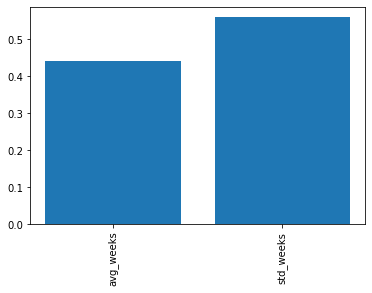

In [5]:
# init experiment
exp = Experiment(
    name="random-forest", 
    data=flights_train
)

# run experiment
exp.run(config)

In [6]:
exp.meta["cache"]['model']

RandomForestRegressor()

In [7]:
score, best_params = exp.grid_search(config=config_grid)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [8]:
best_params

{'max_depth': 7}

-- Model start -------------
x_columns :  ['avg_weeks', 'std_weeks']
> fit model ...
model : RandomForestRegressor(max_depth=7)
> cv results : 


> score model ...
RMSE on train : 0.8946083828292906
RMSE on test : 0.9247956048423631
--Feat imporance  ...
 


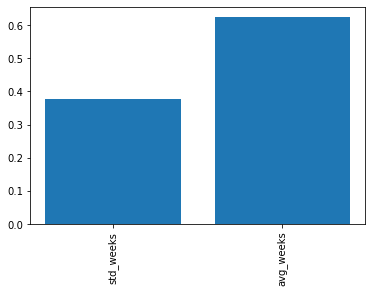

In [9]:
# run model with best params
config["model"]["model_params"] = best_params
exp.run(config=config, use_cache=True)

In [10]:
# exp.freeze("submission", flights_test, with_sub=True)